In [2]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Основные этапы:
0) Загрузка данных
1) Оценка датасета
2) Предварительная обработка
3) Исследовательский анализ данных
4) Отбор и выделение признаков

-----

## Этап 0. Загрузка данных

In [3]:
df = pd.read_csv('C:\PYTHON\Predicting_cost_car\Files\car_data_2023-12-16.csv')
df.head(5)

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_35260\1852693800.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('C:\PYTHON\Predicting_cost_car\Files\car_data_2023-12-16.csv')


,Brand_Model,Price,Year,Condition,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo
0,Audi A6 3.0 AMT,1700000,2012,Не битая,3.0 AMT (245 л.с.),209 000 км,седан,полный,дизель,Тольятти,https://www.avito.ru/tolyatti/avtomobili/audi_...,NaN
1,Audi Q7 3.0 AT,2150000,2009,Не битая,3.0 AT (239 л.с.),5 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q7...,NaN
2,Audi A6 3.0 AMT,2700000,2015,Не битая,3.0 AMT (333 л.с.),149 000 км,седан,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a6...,NaN
3,Audi A5 2.0 AMT,5890000,2022,Не битая,2.0 AMT (249 л.с.),5 400 км,лифтбек,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
4,Audi Q5 2.0 AMT,3150000,2019,Не битая,2.0 AMT (163 л.с.),61 000 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q5...,NaN


-----

## Этап 1. Предварительный анализ данных

In [4]:
df.shape

(19147, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19147 entries, 0 to 19146
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand_Model      19147 non-null  object 
 1   Price            19147 non-null  int64  
 2   Year             19147 non-null  int64  
 3   Condition        19147 non-null  object 
 4   Engine_capacity  19147 non-null  object 
 5   Mileage          19147 non-null  object 
 6   Body_type        19147 non-null  object 
 7   Drive_type       19147 non-null  object 
 8   Engine_type      19147 non-null  object 
 9   City             19147 non-null  object 
 10  Link             19147 non-null  object 
 11  Photo            0 non-null      float64
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


сохраним начальный DataFrame

In [6]:
df_old = df

-----

## Этап 2. Предварительная обработка данных

#### 2.1 Проверка пропущенных значений - None 

In [7]:
df.isnull().sum()

Brand_Model            0
Price                  0
Year                   0
Condition              0
Engine_capacity        0
Mileage                0
Body_type              0
Drive_type             0
Engine_type            0
City                   0
Link                   0
Photo              19147
dtype: int64

#### 2.2 Проверка на дублирующиеся значения

In [8]:
duplicates = df[df.duplicated()]
duplicates

,Brand_Model,Price,Year,Condition,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo
94,Audi A4 1.8 CVT,1199000,2012,Не битая,1.8 CVT (170 л.с.),231 000 км,седан,передний,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a4...,NaN
329,BMW X5 4.4 AT,9500000,2020,Не битая,4.4 AT (530 л.с.),39 866 км,внедорожник,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/bmw_x5_...,NaN
332,BMW X4 2.0 AT,6200000,2020,Не битая,2 AT (184 л.с.),35 141 км,внедорожник,полный,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/bmw_x...,NaN
334,BMW X5 3.0 AT,6990000,2019,Не битая,3 AT (265 л.с.),105 910 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/bmw_x5_...,NaN
343,BMW X5 2.0 AT,6649000,2019,Не битая,2.0 AT (231 л.с.),48 231 км,внедорожник,полный,дизель,Самара,https://www.avito.ru/samara/avtomobili/bmw_x5_...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
18789,ГАЗ ГАЗель 3221 2.4 MT,220000,2005,Не битая,2.4 MT (90 л.с.),246 500 км,микроавтобус,задний,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_g...,NaN
18790,ГАЗ ГАЗель 3302 2.4 MT,210000,2001,Не битая,2.4 MT (90 л.с.),180 000 км,фургон,задний,бензин,"Тольятти, СНТ Синтезкаучук",https://www.avito.ru/tolyatti/avtomobili/gaz_g...,NaN
18792,ГАЗ 69 2.1 MT,500000,1970,Не битая,2.1 MT (55 л.с.),54 000 км,внедорожник,полный,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_6...,NaN
18794,ГАЗ ГАЗель Next 2.8 MT,2550000,2018,Не битая,2.8 MT (150 л.с.),284 000 км,фургон,задний,дизель,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_g...,NaN


In [9]:
df = df.drop_duplicates()

#### 2.3 Работа с каждым столбцом

`Brand_Model` - модель и бренд + обьем двигателя/тип коробки передач, хранятся в одном столбце, так как иначе возникли бы сложности при парсинге данных

**Задача** - создать столбцы `Brand`, `Model`  - отвечающие за марку, модель тип коробки передач автомобилей соответственно

Данные в колоне `Brand_Model` представленны следующим образом

In [10]:
unique_Brand_Model = df['Brand_Model'].unique()
unique_Brand_Model

array(['Audi A6 3.0 AMT', 'Audi Q7 3.0 AT', 'Audi A5 2.0 AMT', ...,
       'Acura TSX 2.4 AT', 'Acura TLX 3.5 AT', 'Acura Integra 1.5 CVT'],
      dtype=object)

In [11]:
list_Brand, list_Model, list_Transmission = [], [], []

for BM, ET in zip(df['Brand_Model'], df['Engine_type']):
    split_BM = BM.split(' ')
    list_Brand.append(split_BM[0])
    if ET == 'электро':
        list_Model.append(' '.join(split_BM[1:-1]))
    else: list_Model.append(' '.join(split_BM[1:-2]))

print(len(list_Brand), list_Brand[:10])
print(len(list_Model), list_Model[:10])


15703 ['Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi', 'Audi']
15703 ['A6', 'Q7', 'A6', 'A5', 'Q5', 'A5', 'RS Q3', 'Q3', 'Q7', 'Q8']


In [12]:
df['Brand'] = list_Brand
df['Model'] = list_Model
df = df.drop(columns=['Brand_Model'])

C:\Users\фвьшт\AppData\Local\Temp\ipykernel_35260\650004316.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'] = list_Brand
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_35260\650004316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Model'] = list_Model


---

`Brand` - данные о бренде автомобиля, самые популярные марки на авито.ру

In [13]:
print(f'Всего марок в датасете:= {df['Brand'].nunique()}')

Всего марок в датасете:= 29


In [14]:
df['Brand'].unique()

array(['Audi', 'BMW', 'Chery', 'Chevrolet', 'Daewoo', 'Datsun', 'Ford',
       'Geely', 'Haval', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Renault', 'Skoda', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'ВАЗ', 'ГАЗ', 'УАЗ', 'Acura'], dtype=object)

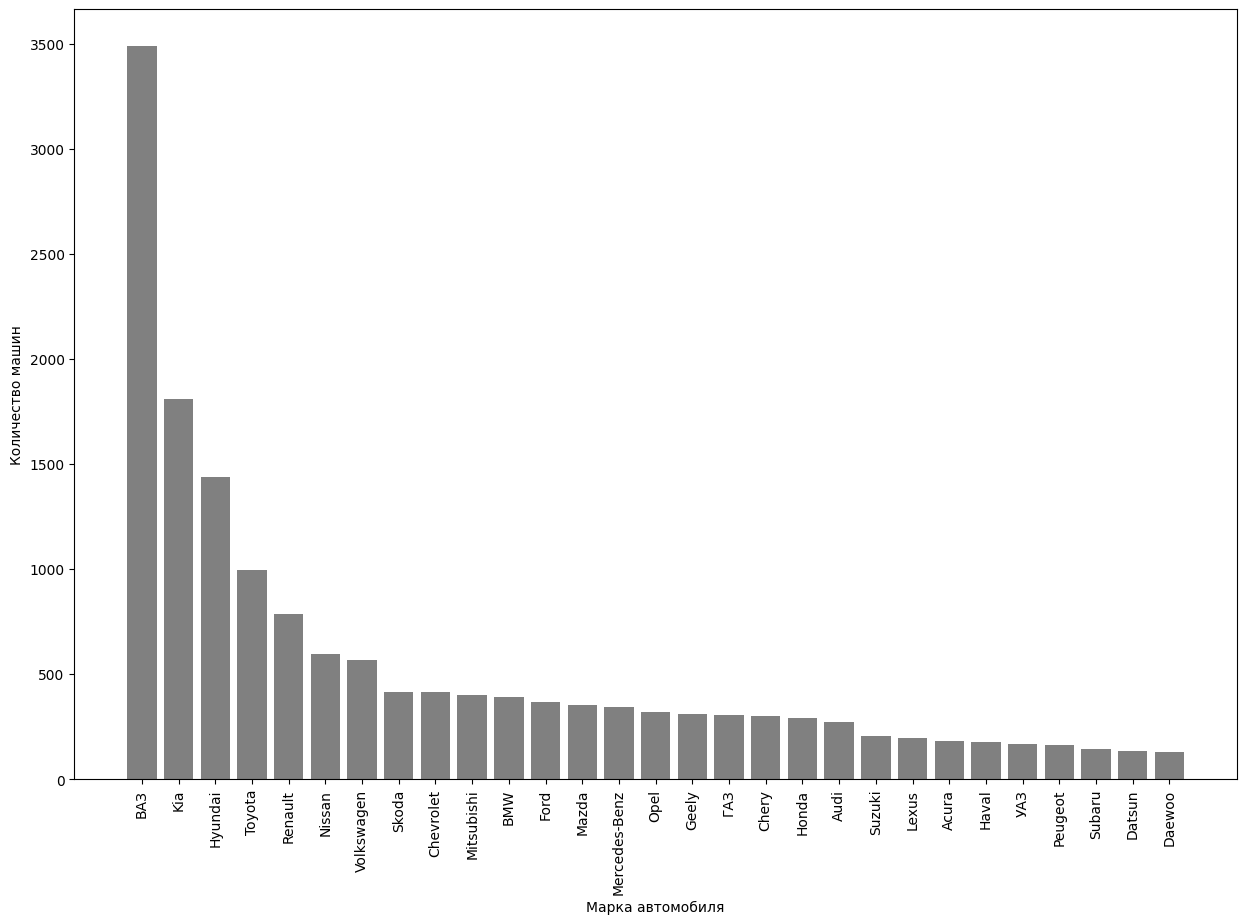

In [15]:
brand_counts = df['Brand'].value_counts()

plt.figure(figsize=(15, 10)) 
plt.bar(brand_counts.index, brand_counts.values, color='gray')
plt.xlabel('Марка автомобиля')
plt.ylabel('Количество машин')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

---

`Model` - данные о модели автомобилей, самых популярных марок на авито.ру

In [16]:
print(f'Всего в датасета моделей:= {df['Model'].nunique()}')

Всего в датасета моделей:= 707


In [17]:
df['Model'].unique()[:50]

array(['A6', 'Q7', 'A5', 'Q5', 'RS Q3', 'Q3', 'Q8', 'A4 Allroad Quattro',
       'A3', 'A4', '80', 'SQ8', 'A7', 'A6 Allroad Quattro', 'A8', 'TT',
       '100', 'A1', 'e-tron Sportback', 'e-tron S Sportback', 'S8', 'TTS',
       '90', 'e-tron', 'X7', 'X1', '3 серия GT', '7 серия', '3 серия',
       'X5', '5 серия', 'X3', 'X6', 'X4', '4 серия', '1 серия', 'X6 M',
       '5 серия GT', 'Z4', 'iX', '', '2 серия Active Tourer', 'X5 M',
       '8 серия Gran Coupe', 'X2', 'i3', 'M5', '8 серия', '6 серия GT',
       '6 серия'], dtype=object)

Топ 50 самых популярных моделей автомобилей

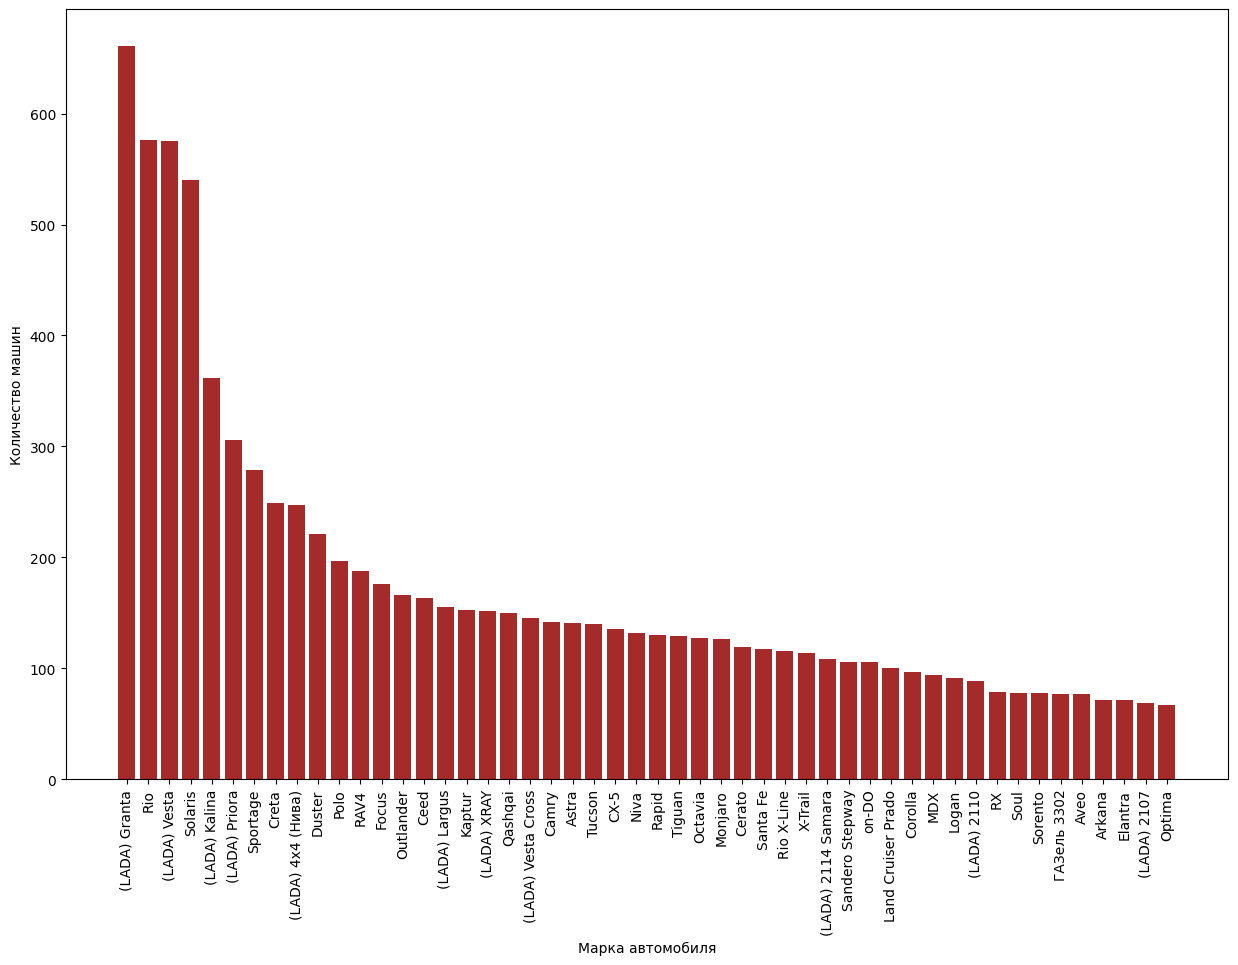

In [18]:
model_counts = df['Model'].value_counts().nlargest(50)

plt.figure(figsize=(15, 10)) 
plt.bar(model_counts.index, model_counts.values, color='brown')
plt.xlabel('Марка автомобиля')
plt.ylabel('Количество машин')
plt.xticks(rotation=90)  # Поворачиваем подписи по оси X для лучшей читаемости
plt.show()

In [19]:
def get_bar_stat(Name, signature, color_1='royalblue', color_2='forestgreen'):
    # Гистограмма по количеству автомобилей
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    counts = df[Name].value_counts()
    plt.bar(counts.index, counts.values, color=color_1)
    plt.xlabel(signature)
    plt.ylabel('Количество автомобилей')
    plt.xticks(rotation=90)

    # Гистограмма по средней цене автомобиля 
    plt.subplot(1, 2, 2)
    avg_price = df.groupby(Name)['Price'].mean()
    avg_price = avg_price.sort_values(ascending=False)
    plt.bar(avg_price.index, avg_price.values, color=color_2)
    plt.xlabel(signature)
    plt.ylabel('Средняя цена автомобиля')
    plt.xticks(rotation=90)

    plt.show()

---

`Transmission` - тип коробки передач автомобиля, которая содержит следующие аббревиатуры

* CVT - вариаторная трансмиссия
* AT - автоматическая трансмиссия
* AMT - роботизированная механическая трансмиссия
* MT - механическая трансмиссия (коробка передач)

**Задачи** 
1) Создать столбец `Transmission` - тип трансмиссии
2) Проверить на выбросы

In [20]:
list_Transmission = []

for EC, ET in zip(df['Engine_capacity'], df['Engine_type']):
    split_EC = EC.split(' ')
    if ET == 'электро':
        list_Transmission.append(''.join(split_EC[0]))
    else: list_Transmission.append(''.join(split_EC[1]))

print(f'Кодичество строк совпадает - {df.shape[0] == len(list_Transmission)}')

Кодичество строк совпадает - True


In [21]:
if df.shape[0] == len(list_Transmission):
    df['Transmission'] = list_Transmission

In [22]:
print(f'Всего типов коробок передач в датасете:= {df['Transmission'].nunique()}')

Всего типов коробок передач в датасете:= 4


In [23]:
df['Transmission'].unique()

array(['AMT', 'AT', 'CVT', 'MT'], dtype=object)

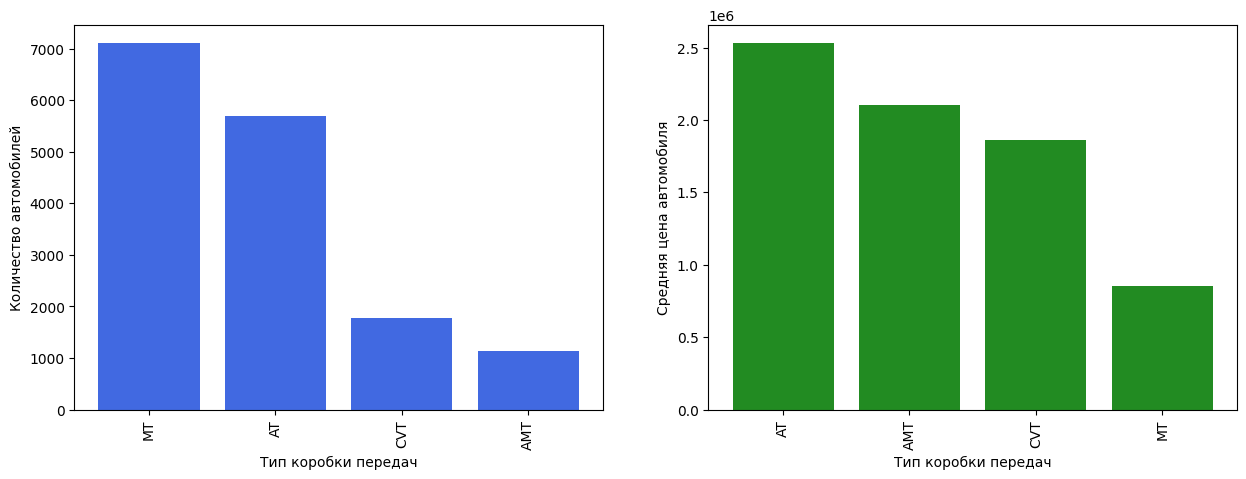

In [24]:
get_bar_stat(Name='Transmission', signature='Тип коробки передач')

---

`Price` - цена автомобиля

**Задача** - Проверить наличие выбросов

In [25]:
df['Price'].head(5)

0    1700000
1    2150000
2    2700000
3    5890000
4    3150000
Name: Price, dtype: int64

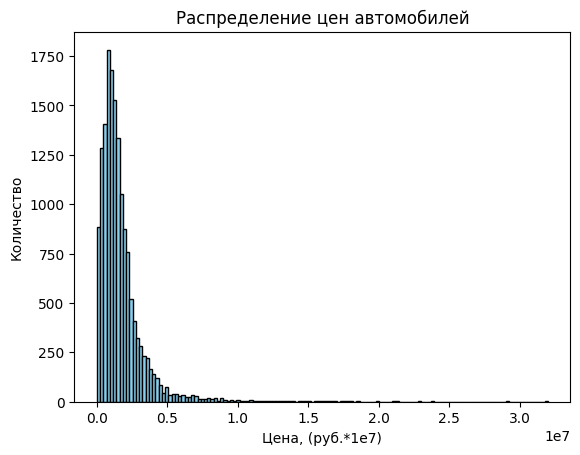

In [26]:
counts, bins, patches = plt.hist(df['Price'], bins='scott', color='skyblue', edgecolor='black')
plt.xlabel('Цена, (руб.*1e7)')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

Построение boxplot

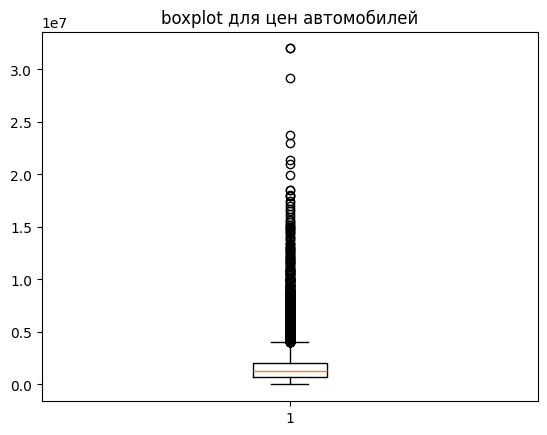

In [27]:
plt.boxplot(df['Price'])
plt.title('boxplot для цен автомобилей')
plt.show()

In [28]:
# Вычисление Z-оценки
z_scores = stats.zscore(df['Price'])
threshold = 3
outliers = df['Price'][z_scores > threshold]
print('Выбросы по Z-оценке:', outliers)

Выбросы по Z-оценке: 8        12899000
9         8450000
11       11990000
13        7300000
24       18490000
           ...   
19076     7500000
19087     8300000
19089     8700000
19098     7100000
19100     8650000
Name: Price, Length: 288, dtype: int64


In [29]:
# Вычисление квартилей
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]['Price']
print('Выбросы по квартилям:', outliers)

Выбросы по квартилям: 3         5890000
5         4990000
8        12899000
9         8450000
11       11990000
           ...   
19098     7100000
19100     8650000
19105     4300000
19107     5670000
19112     5400000
Name: Price, Length: 878, dtype: int64


Статистические методы не показали ожидаемого результата, учитываться не будут

Имеются как анамольно маленькие значения, так и большие

In [30]:
df.sort_values(by='Price').head(5)

,Price,Year,Condition,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo,Brand,Model,Transmission
18656,1000,2004,Не битая,2.3 MT (131 л.с.),200 000 км,седан,задний,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_3...,NaN,ГАЗ,31105 Волга,MT
16008,1000,2006,Не битая,1.5 MT (76 л.с.),250 000 км,седан,передний,бензин,с. Бобровка,https://www.avito.ru/spiridonovka/avtomobili/v...,NaN,ВАЗ,(LADA) 2115 Samara,MT
3105,10000,1994,Не битая,1.6 AT (120 л.с.),123 321 км,универсал,полный,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/honda...,NaN,Honda,Civic,AT
16937,25000,1999,Не битая,0.7 MT (33 л.с.),75 000 км,хетчбэк,передний,бензин,Самара,https://www.avito.ru/samara/avtomobili/vaz_lad...,NaN,ВАЗ,(LADA) 1111 Ока,MT
17623,30000,1998,Не битая,1.5 MT (73 л.с.),200 000 км,седан,передний,бензин,"Самарская область, Безенчукский район, сельско...",https://www.avito.ru/bezenchuk/avtomobili/vaz_...,NaN,ВАЗ,(LADA) 2110,MT


<Axes: title={'center': 'Статистика по маркам автомобилей с ценой менее 50т.р.'}, ylabel='Brand'>

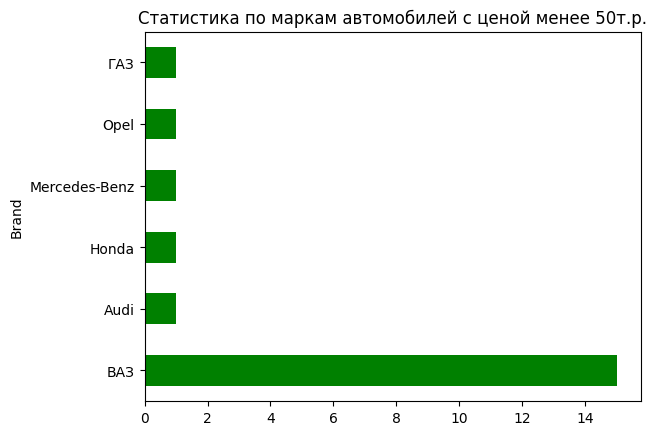

In [31]:
df[df['Price'] < 50000]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с ценой менее 50т.р.', color='green')

После анализа обьявлений автомобилей с ценой менее 50.000р, было принято решение удалить их из датасета, так как большинство данных обьявления представляю собой продажу запчастей (особенно если состояние - Битая)

In [32]:
df = df[df['Price'] > 50000]

In [33]:
df.sort_values(by='Price', ascending=False).head(5)

,Price,Year,Condition,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo,Brand,Model,Transmission
8179,31990000,2022,Не битая,4.0 AT (503 л.с.),3 929 км,седан,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN,Mercedes-Benz,Maybach S-класс,AT
8123,31990000,2022,Не битая,4 AT (503 л.с.),3 929 км,седан,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN,Mercedes-Benz,Maybach S-класс,AT
7998,29200000,2023,Не битая,4.0 AT (585 л.с.),830 км,внедорожник,полный,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN,Mercedes-Benz,G-класс AMG,AT
423,23800000,2023,Не битая,3.0 AT (340 л.с.),215 км,внедорожник,полный,дизель,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN,BMW,X7,AT
450,23000000,2023,Не битая,3 AT (380 л.с.),55 км,внедорожник,полный,бензин,Нижний Новгород,https://www.avito.ru/nizhniy_novgorod/avtomobi...,NaN,BMW,X7,AT


<Axes: title={'center': 'Статистика по маркам автомобилей с ценой более 20.000т.р.'}, ylabel='Brand'>

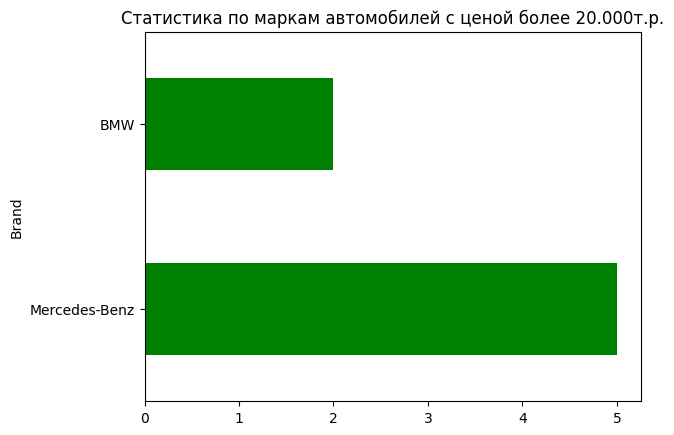

In [34]:
df[df['Price'] > 20000000]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с ценой более 20.000т.р.', color='green')

После анализа было выявлено что обьявления представляют собой автомобили премиум класса, зачастую продаваемые различными компаниями 

* Проанализировать работу модели с этими обьявлениями и без них, сравнить результаты

---


`Year` - дата производства автомобиля

**Задача** - проверить на наличие выбросов

In [35]:
df['Year'].sort_values()

2439     1922
18791    1932
9800     1939
18632    1948
18702    1950
         ... 
539      2023
6380     2023
3958     2023
17782    2023
11997    2023
Name: Year, Length: 15668, dtype: int64

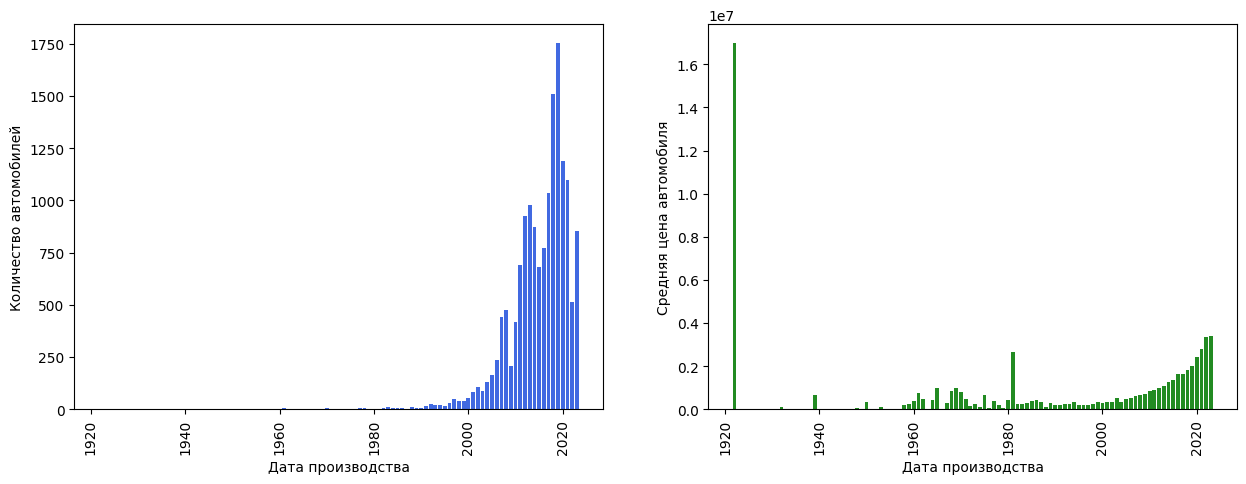

In [36]:
get_bar_stat(Name='Year', signature='Дата производства')

Text(0.5, 1.0, 'Зависимость цены автомобиля от года выпуска')

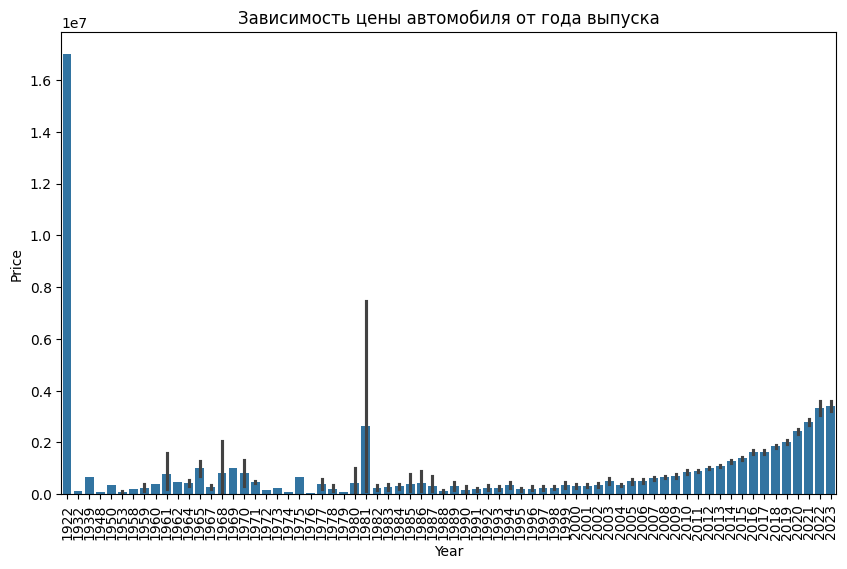

In [37]:
ax, fig = plt.subplots(figsize=(10, 6))  # посмотрим на зависимость стоимости автомобиля от года выпуска.
sns.barplot(data=df, x=df['Year'], y=df['Price'])
plt.xticks(rotation=90)
plt.title('Зависимость цены автомобиля от года выпуска')

**Вывод:** Видим тенденцию к росту средней стоимости автомобиля при увеличении года выпуска, иначе говоря, новые машины стоят дороже, что закономерно. Но данная закономерность нарушается время от времени. Это можно объяснить удорожанием конкретных представляющих ценность моделей, а также их количество на рынке, то есть, например, на площадке может быть выставлены несколько редкий автомобилей (1922г. и 1981г.)

In [38]:
df[df['Year'] == 1922]

,Price,Year,Condition,Engine_capacity,Mileage,Body_type,Drive_type,Engine_type,City,Link,Photo,Brand,Model,Transmission
2439,17000000,1922,Не битая,2.9 MT (20 л.с.),68 000 км,кабриолет,задний,бензин,Самара,https://www.avito.ru/samara/avtomobili/ford_mo...,NaN,Ford,Model T,MT


Так как автомобиль 1922 - в единичном экземпляре, его нужно удалить для корректной работы модели

In [39]:
df = df[df['Year'] != 1922]

Text(0.5, 1.0, 'Зависимость цены автомобиля от года выпуска')

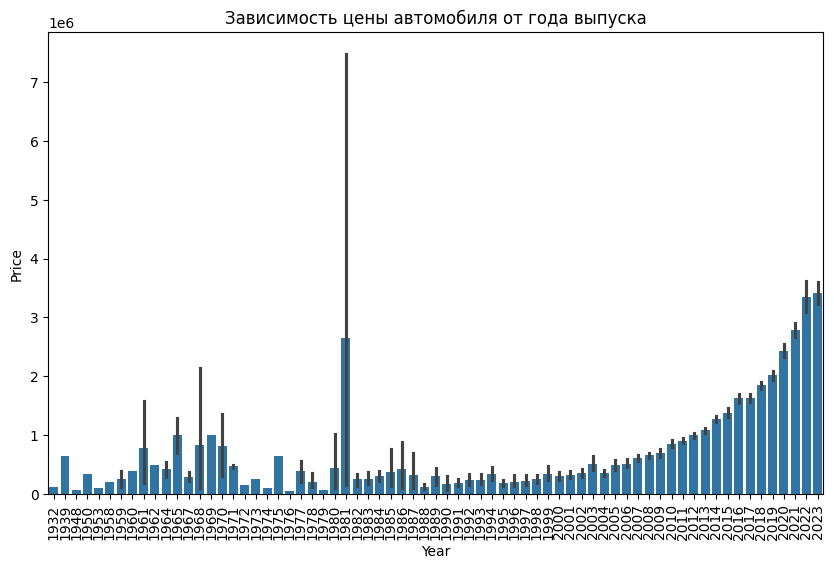

In [40]:
ax, fig = plt.subplots(figsize=(10, 6))  # посмотрим на зависимость стоимости автомобиля от года выпуска.
sns.barplot(data=df, x=df['Year'], y=df['Price'])
plt.xticks(rotation=90)
plt.title('Зависимость цены автомобиля от года выпуска')

---


`Condition` - состояние автомобиля (Битая или не битая)

**Задачи** 
1) Перевести в бинарную систему счислени, 1 - Битая, 0 - Не битая
2) Проверить на начилие выбросов

In [41]:
df['Condition'] = df['Condition'].replace({'Битая': 1, 'Не битая': 0})
df['Condition'].unique()

array([0, 1], dtype=int64)

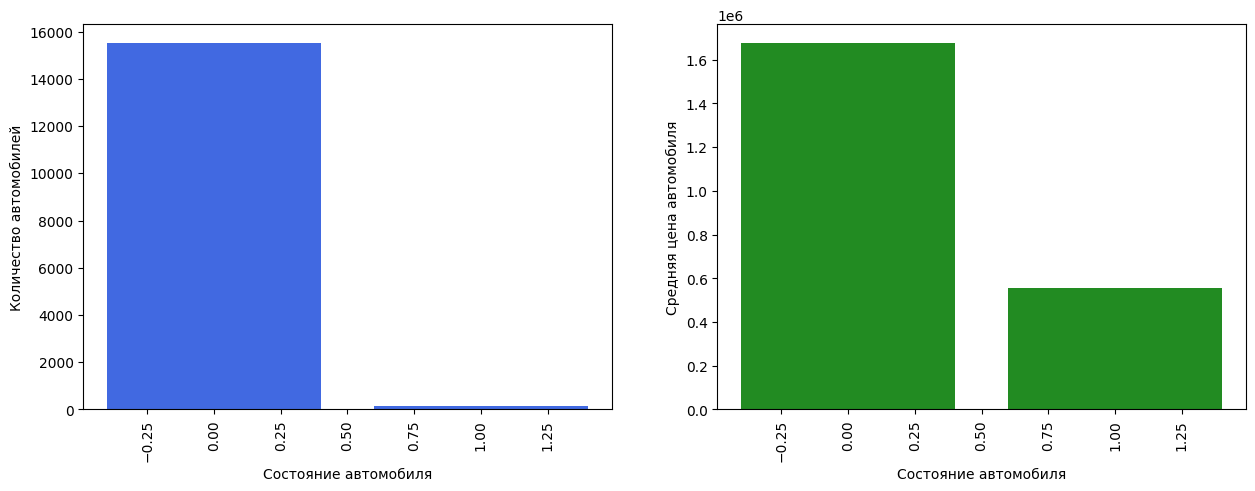

In [42]:
get_bar_stat(Name='Condition', signature='Состояние автомобиля')

---

`Engine_capacity` (в дальнейшем `Count_horsepower`) - данные двигателя представленные в формате (обьем двигателя/коробка передач/количество лошадиных сил)

*Данные о коробке передач находятся в `Transmission`. Так как в датасете присутствуют как автомобили с ДВС, так и с электродвигателем, то было решено не учитывать данные об обьеме двигателя, но данные о количестве лошадиных сил будут учитываться, к тому же эти две переменные очень сильно коррелируют между собой, что может сказаться на работе модели*

**Задача** 
1) Сохранить данные о количестве лошадиных сил
2) Проверить на наличие выбросов 

In [43]:
unique_energe_capacity  = list(df['Engine_capacity'].unique())
unique_energe_capacity[:10]

['3.0 AMT (245\xa0л.с.)',
 '3.0 AT (239\xa0л.с.)',
 '3.0 AMT (333\xa0л.с.)',
 '2.0 AMT (249\xa0л.с.)',
 '2.0 AMT (163\xa0л.с.)',
 '2.0 AMT (190\xa0л.с.)',
 '2.5 AMT (310\xa0л.с.)',
 '2 AMT (184\xa0л.с.)',
 '3 AT (249\xa0л.с.)',
 '3.0 AT (286\xa0л.с.)']

In [44]:
df["Count_horsepower"] = df["Engine_capacity"].apply(lambda x: re.findall(r"\d+", x)[-1]).astype(int)
df = df.drop(columns=['Engine_capacity'])
df['Count_horsepower']

0        245
1        239
2        333
3        249
4        163
        ... 
19142    300
19143    300
19144    300
19145    290
19146    300
Name: Count_horsepower, Length: 15667, dtype: int32

In [45]:
new_order = ['Brand', 'Model', 'Price', 'Year', 'Condition', 'Transmission', 'Mileage', 'Body_type', 'Drive_type', 'Count_horsepower', 'Engine_type', 'City', 'Link', 'Photo']
df = df.reindex(columns=new_order)

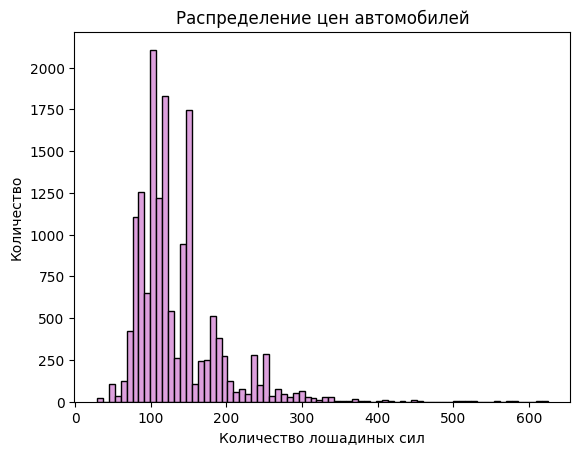

In [46]:
counts, bins, patches = plt.hist(df['Count_horsepower'], bins='scott', color='plum', edgecolor='black')
plt.xlabel('Количество лошадиных сил')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

In [47]:
df[df['Count_horsepower'] < 50].head(5)

,Brand,Model,Price,Year,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
8700,Mitsubishi,EK Wagon,650000,2019,0,CVT,30 000 км,хетчбэк,передний,49,бензин,Владивосток,https://www.avito.ru/vladivostok/avtomobili/mi...,NaN
8712,Mitsubishi,EK Wagon,780000,2020,0,CVT,13 000 км,хетчбэк,передний,49,бензин,Владивосток,https://www.avito.ru/vladivostok/avtomobili/mi...,NaN
9053,Nissan,Dayz,520000,2015,0,CVT,60 000 км,хетчбэк,полный,49,бензин,Владивосток,https://www.avito.ru/vladivostok/avtomobili/ni...,NaN
9087,Nissan,Dayz,570000,2019,0,CVT,60 000 км,хетчбэк,полный,49,бензин,Владивосток,https://www.avito.ru/vladivostok/avtomobili/ni...,NaN
9501,Nissan,Dayz Roox,600000,2019,0,CVT,11 000 км,хетчбэк,передний,49,бензин,Владивосток,https://www.avito.ru/vladivostok/avtomobili/ni...,NaN


<Axes: title={'center': 'Статистика по маркам автомобилей с мощностью менее 50 л.с.'}, ylabel='Brand'>

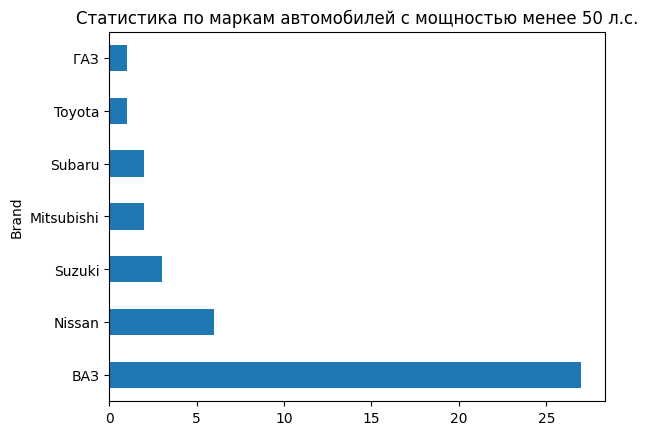

In [48]:
df[df['Count_horsepower'] < 50]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с мощностью менее 50 л.с.')

In [49]:
df[df['Count_horsepower'] > 600]

,Brand,Model,Price,Year,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
486,BMW,M5,9499999,2019,0,AT,49 000 км,седан,полный,625,бензин,Самара,https://www.avito.ru/samara/avtomobili/bmw_m5_...,NaN
494,BMW,M5,9650000,2019,0,AT,50 500 км,седан,полный,625,бензин,Самара,https://www.avito.ru/samara/avtomobili/bmw_m5_...,NaN
7931,Mercedes-Benz,S-класс AMG,9300000,2019,0,AT,62 000 км,седан,полный,612,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN
7950,Mercedes-Benz,G-класс AMG,10200000,2012,0,AT,46 265 км,внедорожник,полный,612,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/merce...,NaN
8129,Mercedes-Benz,GLE-класс AMG Coupe,16700000,2021,0,AT,7 000 км,внедорожник,полный,612,бензин,Самара,https://www.avito.ru/samara/avtomobili/mercede...,NaN


<Axes: title={'center': 'Статистика по маркам автомобилей с мощностью более 600 л.с.'}, ylabel='Brand'>

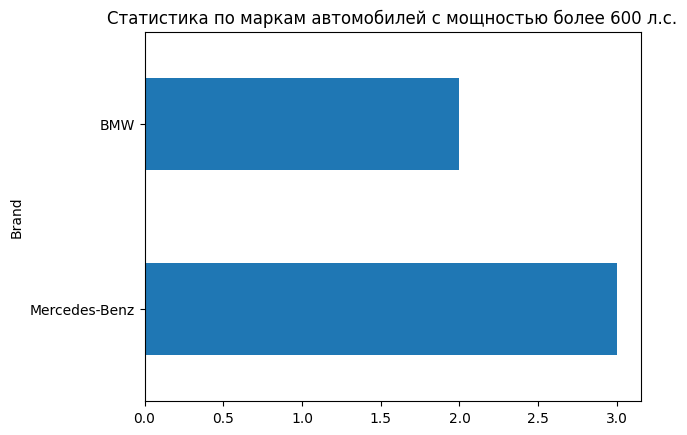

In [50]:
df[df['Count_horsepower'] > 600]['Brand'].value_counts().plot(kind='barh', title='Статистика по маркам автомобилей с мощностью более 600 л.с.')

In [51]:
df = df[(df['Count_horsepower']<= 650) & (df['Count_horsepower']>=50)]

---


`Mileage` - пробег автомобиля (км.)

**Задача** 
1) Привести данные к целочисленному формату
2) Проверить на наличие выбросов

In [52]:
df['Mileage'] = df['Mileage'].str.replace('\xa0', '').str.replace('км', '').astype(int)

In [53]:
df['Mileage'].info()

<class 'pandas.core.series.Series'>
Index: 15625 entries, 0 to 19146
Series name: Mileage
Non-Null Count  Dtype
--------------  -----
15625 non-null  int32
dtypes: int32(1)
memory usage: 183.1 KB


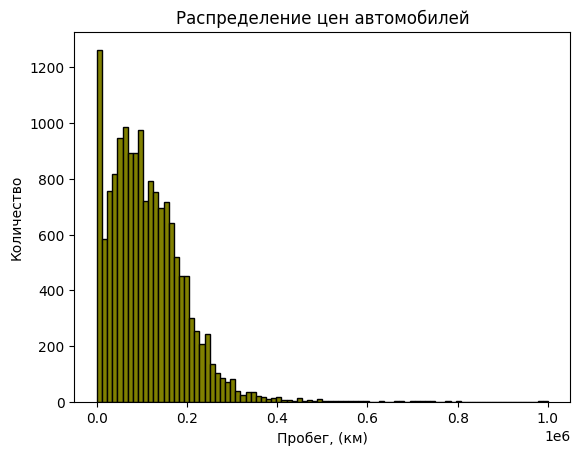

In [54]:
counts, bins, patches = plt.hist(df['Mileage'], bins='scott', color='olive', edgecolor='black')
plt.xlabel('Пробег, (км)')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

Наблюдается большое множество автомобилей с маленьки пробегом -> не выброс

А вот значения с аномально большим пробегом нужно проверить

In [55]:
df[df['Mileage'] > 700000]

,Brand,Model,Price,Year,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
239,Audi,90,100000,1988,1,MT,1000000,седан,передний,136,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_90...,NaN
2081,Ford,Mondeo,268370,2004,0,MT,716000,седан,передний,125,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/ford_...,NaN
2399,Ford,Transit,650000,2011,0,MT,800000,микроавтобус,задний,140,дизель,Самара,https://www.avito.ru/samara/avtomobili/ford_tr...,NaN
7147,Kia,Sportage,2300000,2019,0,AT,710000,внедорожник,передний,186,дизель,Владивосток,https://www.avito.ru/vladivostok/avtomobili/ki...,NaN
10065,Peugeot,407,1292933,2004,0,MT,980000,седан,передний,116,бензин,Шигоны,https://www.avito.ru/shigony/avtomobili/peugeo...,NaN
10087,Peugeot,Boxer,890000,2013,0,MT,750000,микроавтобус,передний,130,дизель,Тольятти,https://www.avito.ru/tolyatti/avtomobili/peuge...,NaN
15794,ВАЗ,(LADA) Priora,175000,2010,1,MT,1000000,хетчбэк,передний,81,бензин,пос. Придорожный,https://www.avito.ru/samara/avtomobili/vaz_lad...,NaN
18503,ГАЗ,ГАЗель Next,1000000,2021,1,MT,999999,фургон,задний,150,дизель,Самара,https://www.avito.ru/samara/avtomobili/gaz_gaz...,NaN
18639,ГАЗ,ГАЗель 3302,650000,2009,0,MT,731000,фургон,задний,140,бензин,Тольятти,https://www.avito.ru/tolyatti/avtomobili/gaz_g...,NaN
18979,Acura,MDX,222222,2004,0,AT,777777,внедорожник,полный,265,бензин,Москва,https://www.avito.ru/moskva/avtomobili/acura_m...,NaN


После анализа обьявлений автомобилей с пробегом больше 700.000кm, было принято решение удалить их из датасета, так как большинство данных обьявления представляю собой продажу запчастей (особенно если состояние - Битая)

In [56]:
df[(df['Mileage'] > 500000) & (df['Condition'] == 1)]

,Brand,Model,Price,Year,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
239,Audi,90,100000,1988,1,MT,1000000,седан,передний,136,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_90...,NaN
15794,ВАЗ,(LADA) Priora,175000,2010,1,MT,1000000,хетчбэк,передний,81,бензин,пос. Придорожный,https://www.avito.ru/samara/avtomobili/vaz_lad...,NaN
18503,ГАЗ,ГАЗель Next,1000000,2021,1,MT,999999,фургон,задний,150,дизель,Самара,https://www.avito.ru/samara/avtomobili/gaz_gaz...,NaN


In [57]:
df = df.drop(df[df['Mileage'] > 700000].index)

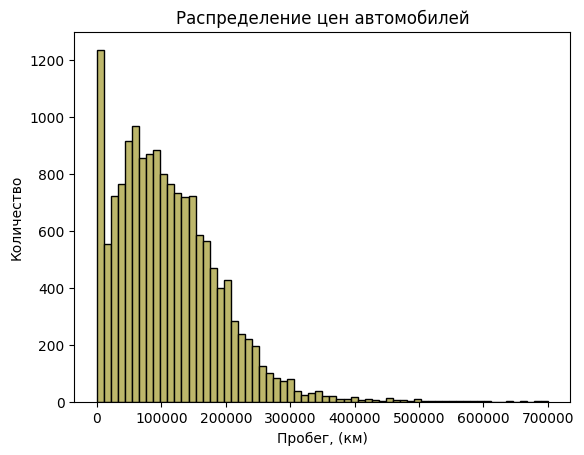

In [58]:
counts, bins, patches = plt.hist(df['Mileage'], bins='scott', color='darkkhaki', edgecolor='black')
plt.xlabel('Пробег, (км)')
plt.ylabel('Количество')
plt.title('Распределение цен автомобилей')
plt.show()

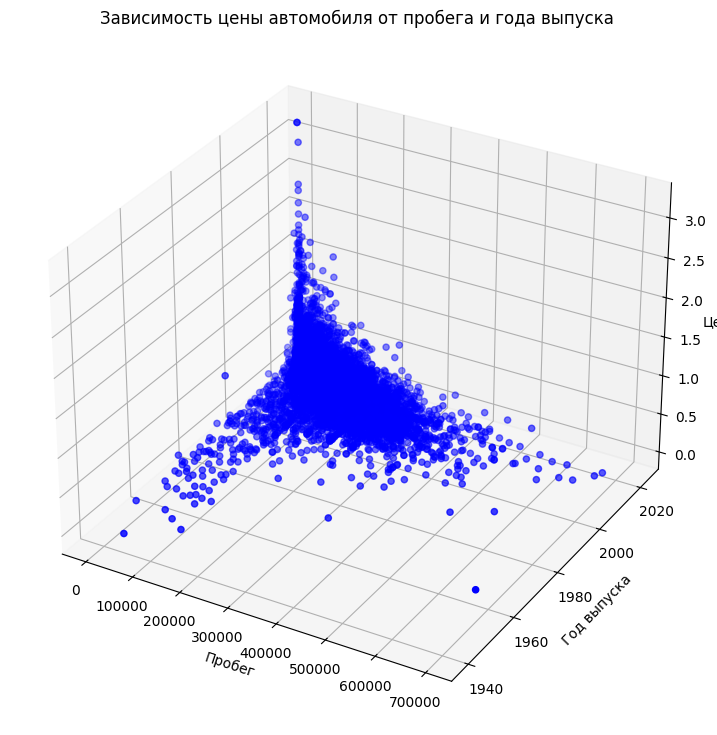

In [59]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x = df['Mileage']
y = df['Year']
z = df['Price']


ax.scatter(x, y, z, color='blue')
plt.xlabel('Пробег')
plt.ylabel('Год выпуска')
ax.set_zlabel('Цена')
plt.title('Зависимость цены автомобиля от пробега и года выпуска');

---

`Body_type` - Тип кузова автомобиля

In [60]:
print(f'Всего типов кузова в датасете:= {df['Body_type'].nunique()}')

Всего типов кузова в датасете:= 11


In [61]:
print(f'Типов кузова в датасете:= {df['Body_type'].unique()}')

Типов кузова в датасете:= ['седан' 'внедорожник' 'лифтбек' 'универсал' 'купе' 'хетчбэк' 'кабриолет'
 'минивэн' 'пикап' 'фургон' 'микроавтобус']


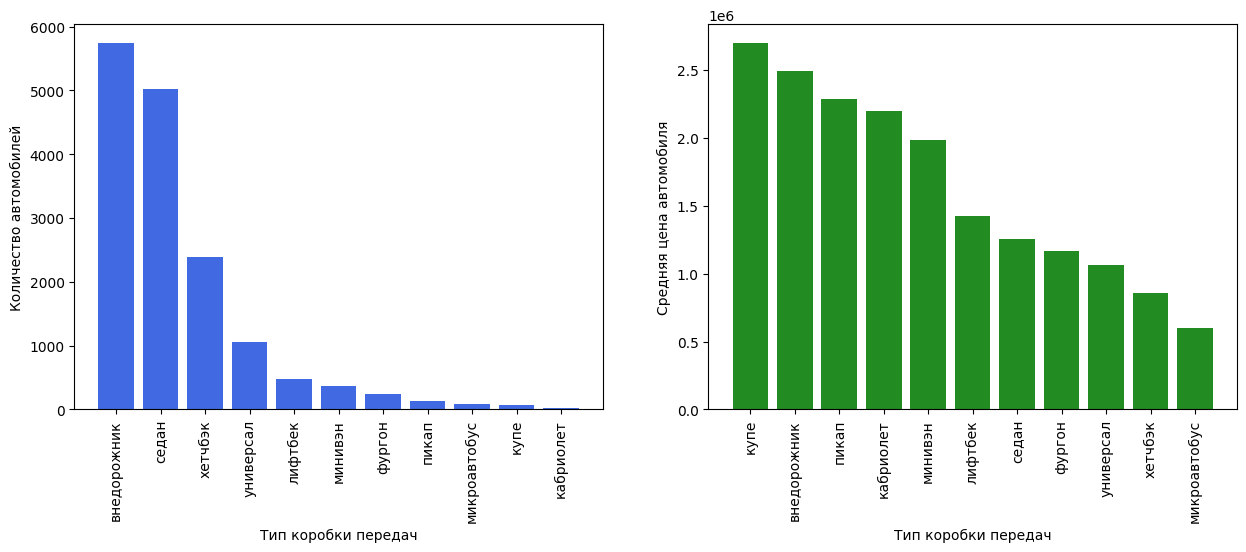

In [62]:
get_bar_stat(Name='Body_type', signature='Тип коробки передач')

---

`Drive_type` - характеристика привода автомобиля, которое передает энергию от двигателя на колеса.

In [63]:
df['Drive_type'].unique()

array(['полный', 'передний', 'задний'], dtype=object)

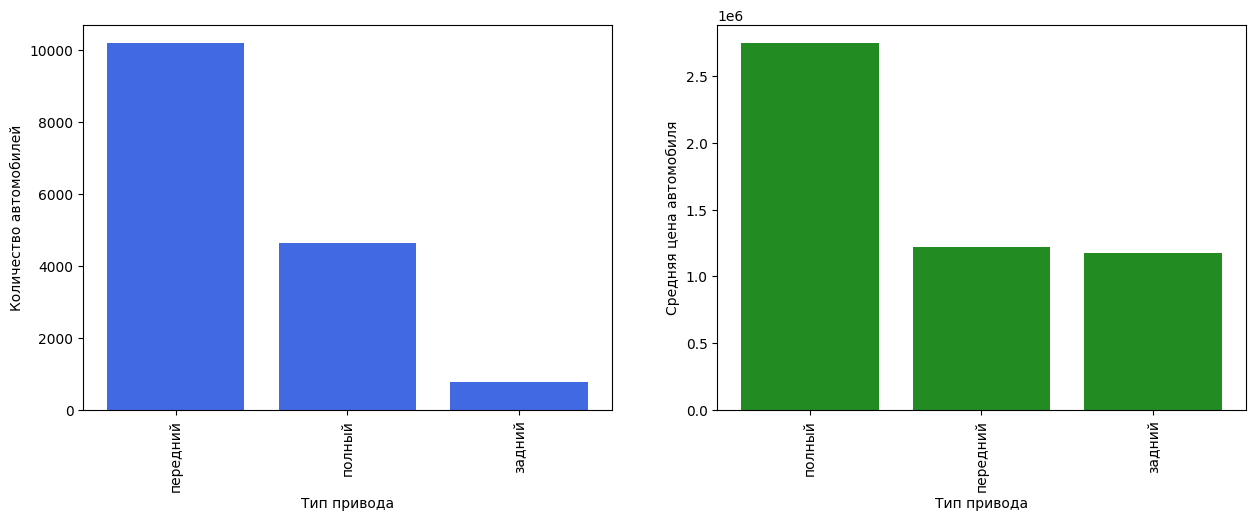

In [64]:
get_bar_stat(Name='Drive_type', signature='Тип привода')

---

`Engine_type` - тип топлива 

In [65]:
print(f'Всего типов топлива в датасете:= {df['Engine_type'].unique()}')

Всего типов топлива в датасете:= ['дизель' 'бензин' 'электро' 'гибрид' 'газ']


In [66]:
df['Engine_type'].value_counts()

Engine_type
бензин     14072
дизель      1217
гибрид       278
электро       37
газ           11
Name: count, dtype: int64

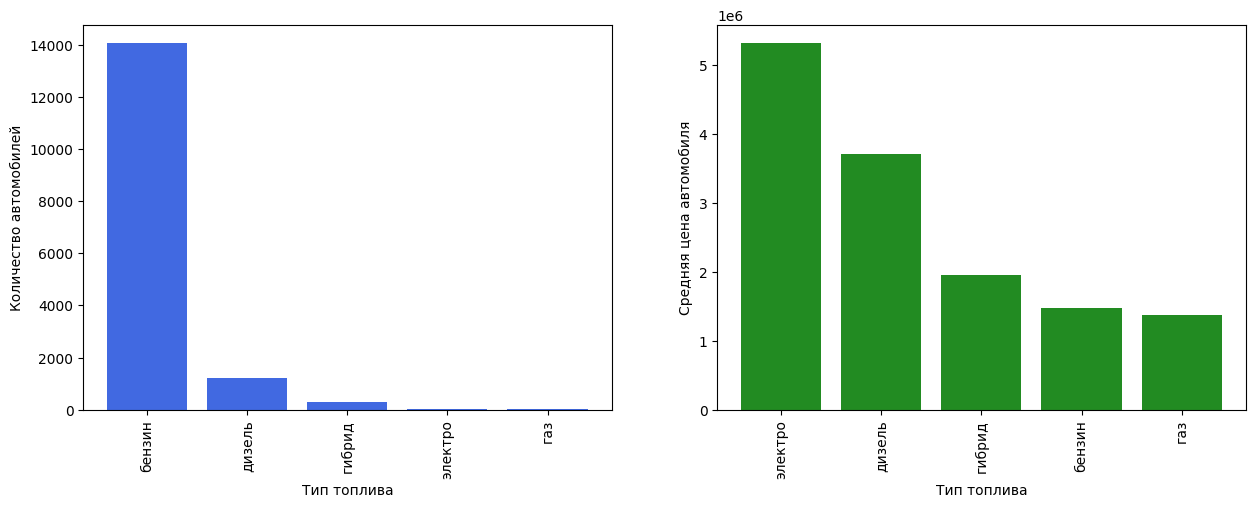

In [67]:
get_bar_stat(Name='Engine_type', signature='Тип топлива')

---

`City` - город продажи автомобиля

In [68]:
list(df['City'].unique())[:20]

['Тольятти',
 'Самара',
 'с. Ягодное',
 'Кинель',
 'Казань',
 'Ижевск',
 'д. Афонино',
 'Пермь',
 'Оренбург',
 'д. Песьянка',
 'Энгельс',
 'Владивосток',
 'Стерлитамак',
 'Набережные Челны',
 'с. Кинель-Черкассы',
 'Новокуйбышевск',
 'Уфа',
 'пос. Пригородный',
 'Ульяновск',
 'Саратов']

`City`, `Link`, `Photo` - данные с информацией для пользователя приложения, при обучении модели учитываться не будут

-----

### Итоги 2 этапа

In [69]:
print(f'Обьем данных до предобработки {df_old.shape}')

Обьем данных до предобработки (19147, 12)


In [70]:
print(f'Обьем данных до предобработки {df.shape}')

Обьем данных до предобработки (15615, 14)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15615 entries, 0 to 19146
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             15615 non-null  object 
 1   Model             15615 non-null  object 
 2   Price             15615 non-null  int64  
 3   Year              15615 non-null  int64  
 4   Condition         15615 non-null  int64  
 5   Transmission      15615 non-null  object 
 6   Mileage           15615 non-null  int32  
 7   Body_type         15615 non-null  object 
 8   Drive_type        15615 non-null  object 
 9   Count_horsepower  15615 non-null  int32  
 10  Engine_type       15615 non-null  object 
 11  City              15615 non-null  object 
 12  Link              15615 non-null  object 
 13  Photo             0 non-null      float64
dtypes: float64(1), int32(2), int64(3), object(8)
memory usage: 1.7+ MB


In [72]:
df.describe()

,Price,Year,Condition,Mileage,Count_horsepower,Photo
count,1.561500e+04,15615.000000,15615.000000,15615.000000,15615.000000,0.0
mean,1.671376e+06,2014.998719,0.008902,110663.090810,135.359462,NaN
std,1.659349e+06,6.593739,0.093931,79397.553134,56.472524,NaN
min,5.300000e+04,1939.000000,0.000000,1.000000,50.000000,NaN
25%,7.500000e+05,2012.000000,0.000000,50512.000000,101.000000,NaN
50%,1.279000e+06,2017.000000,0.000000,99000.000000,123.000000,NaN
75%,2.050000e+06,2019.000000,0.000000,157875.500000,150.000000,NaN
max,3.199000e+07,2023.000000,1.000000,700000.000000,625.000000,NaN


- Добавлены столбцы `Brand`, `Model`, `Transmission`
- Изменено название с Engine_capacity на `Count_horsepower`
- Преобразование в числовые данные `Condition`, `Mileage`, `Count_horsepower`
- Удаление анамальных значений из столбцов `Price`, `Mileage`, `Count_horsepower`

Обновляем индексы строк

In [73]:
df = df.reset_index(drop=True)

Проверяем порядок индексов

In [74]:
df.head()

,Brand,Model,Price,Year,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,City,Link,Photo
0,Audi,A6,1700000,2012,0,AMT,209000,седан,полный,245,дизель,Тольятти,https://www.avito.ru/tolyatti/avtomobili/audi_...,NaN
1,Audi,Q7,2150000,2009,0,AT,5,внедорожник,полный,239,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q7...,NaN
2,Audi,A6,2700000,2015,0,AMT,149000,седан,полный,333,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a6...,NaN
3,Audi,A5,5890000,2022,0,AMT,5400,лифтбек,полный,249,бензин,Самара,https://www.avito.ru/samara/avtomobili/audi_a5...,NaN
4,Audi,Q5,3150000,2019,0,AMT,61000,внедорожник,полный,163,дизель,Самара,https://www.avito.ru/samara/avtomobili/audi_q5...,NaN


Так же сохраним данные которые пригодятся для пользователя tg-bot

In [75]:
df_tg = df

### Признаки:

   * **Brand** - марка автомбиля *(категориальный признак)*
   * **Model** - модель автомобиля *(категориальный признак)*
   * **Year** - год выпуска машины *(вещественный признак)*
   * **Condition** - состояние автомобиля *(вещественный признак)*
   * **Transmission** - трансмиссия автомобиля, т.е. информация о его ведущие колеса  *(категориальный признак)*
   * **Mileage** - пробег, км *(вещественный признак)*
   * **Body_type** - тип кузова *(категориальный признак)*
   * **Drive_type** - тип приводв *(категориальный признак)*
   * **Count_horsepower** - количество лошадиных сил *(вещественный признак)*
   * **Engine_type** - тип потребляемого топлива *(категориальный признак)*
   
И одна целевая переменная **Price** - цена автомобиля, рубли.

### Сохранение датасета после EDA

датасет сохроняется на локальной машине чтобы потом не было необходимости заново запускать ячейки ноутбука

In [76]:
ready_file = "C:\PYTHON\Predicting_cost_car\Files/ready_car_data_" + str(datetime.date.today()) + ".csv"

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_35260\3685757374.py:1: SyntaxWarning: invalid escape sequence '\P'
  ready_file = "C:\PYTHON\Predicting_cost_car\Files/ready_car_data_" + str(datetime.date.today()) + ".csv"


In [77]:
df.to_csv(ready_file, index=False, header=True)

----

## Этап 3. Исследовательский анализ данных

#### 3.1 Анализ вещественных признаков

В корреляциой матрице будут следующие столбцы
- `Price` - цена автомобиля (руб.)
- `Condition` - состояние автомобиля
- `Mileage` - пробег автомобиля (км.)
- `Count_horsepower` - количество лошадиных сил

In [78]:
df_digits = df[['Price', 'Year', 'Condition', 'Mileage', 'Count_horsepower']]

Посмотрим на ключевые статистики по всем вещественным признакам с помощью метода describe.

In [79]:
df_digits.describe()

,Price,Year,Condition,Mileage,Count_horsepower
count,1.561500e+04,15615.000000,15615.000000,15615.000000,15615.000000
mean,1.671376e+06,2014.998719,0.008902,110663.090810,135.359462
std,1.659349e+06,6.593739,0.093931,79397.553134,56.472524
min,5.300000e+04,1939.000000,0.000000,1.000000,50.000000
25%,7.500000e+05,2012.000000,0.000000,50512.000000,101.000000
50%,1.279000e+06,2017.000000,0.000000,99000.000000,123.000000
75%,2.050000e+06,2019.000000,0.000000,157875.500000,150.000000
max,3.199000e+07,2023.000000,1.000000,700000.000000,625.000000


In [80]:
df_digits.corr()

,Price,Year,Condition,Mileage,Count_horsepower
Price,1.000000,0.423461,-0.063481,-0.361259,0.703600
Year,0.423461,1.000000,-0.087877,-0.537967,0.203880
Condition,-0.063481,-0.087877,1.000000,0.075034,-0.035557
Mileage,-0.361259,-0.537967,0.075034,1.000000,-0.072531
Count_horsepower,0.703600,0.203880,-0.035557,-0.072531,1.000000


матрица корреляции тренировочного датасета на числовых переменных

In [81]:
mask = np.zeros_like(df_digits.corr())
triangle_indices = np.tril_indices_from(mask)
mask[triangle_indices] = True

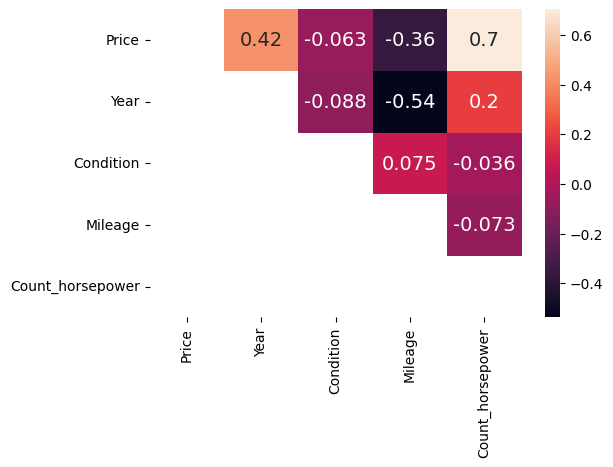

In [82]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_digits.corr(), mask=mask, annot=True, annot_kws={'size': 14})
plt.show()

**Вывод:** Таким образом, проанализировав heatmap и корреляционную матрицу, мы можем установить умереннную положительную взаимосвязь между ценой автомобиля и количеством лошадиных, ценой автомобиля и годом производства, а так же умереннную отрицательную взаимосвязь между пробегом автомобиля и ценой, пробегом автомобиля и годом производства.

## Этап 4. Отбор и создание новых признаков

 Нередко добавление новых осознанных признаков на основе уже имеющихся характеристик способно улучшить качество модели за счет предоставления большей инофрмации об оцениваемых объектах. В этой части проекта мы сфокусируемся непосредственно на придумывании новых признаков, выделенных с помощью ранее выявленных закономерностях в данных.

**Задачи** 
1) Удалить лишние признаки 
2) Создать новые, на основе старых

Удаляем столбцы необходимые только для пользователя 

In [83]:
df = df.drop(['City', 'Link', 'Photo'], axis=1)

In [84]:
df

,Brand,Model,Price,Year,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type
0,Audi,A6,1700000,2012,0,AMT,209000,седан,полный,245,дизель
1,Audi,Q7,2150000,2009,0,AT,5,внедорожник,полный,239,дизель
2,Audi,A6,2700000,2015,0,AMT,149000,седан,полный,333,бензин
3,Audi,A5,5890000,2022,0,AMT,5400,лифтбек,полный,249,бензин
4,Audi,Q5,3150000,2019,0,AMT,61000,внедорожник,полный,163,дизель
...,...,...,...,...,...,...,...,...,...,...,...
15610,Acura,ZDX,599000,2010,1,AT,100000,внедорожник,полный,300,бензин
15611,Acura,MDX,2250000,2010,0,AT,244000,внедорожник,полный,300,бензин
15612,Acura,MDX,1433000,2008,0,AT,245000,внедорожник,полный,300,бензин
15613,Acura,MDX,3157000,2014,0,AT,118000,внедорожник,полный,290,бензин


__1)__ *Usage Intensity* - интенсивность использования автомобиль с момента его выпуска. Рассчитывается как отношение общего пробега к количеству лет использования.

In [85]:
# Будем считать год, с момента производства
df['Usage_intensity'] = df['Mileage'] / (2023 - df['Year'] + 1)

__2)__ *Origin* - признак, обозначающий происхождение автомобиля.

In [86]:
df['Brand'].unique()

array(['Audi', 'BMW', 'Chery', 'Chevrolet', 'Daewoo', 'Datsun', 'Ford',
       'Geely', 'Haval', 'Honda', 'Hyundai', 'Kia', 'Lexus', 'Mazda',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot',
       'Renault', 'Skoda', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'ВАЗ', 'ГАЗ', 'УАЗ', 'Acura'], dtype=object)

In [87]:
# Получим списки автомобилей по происхождению
american_cars = ['Chevrolet', 'Ford']

european_cars = ['Mercedes-Benz', 'Audi', 'BMW', 'Volkswagen', 'Opel', 'Peugeot', 'Renault', 'Skoda']

russian_cars = ['ВАЗ', 'ГАЗ', 'УАЗ']

asian_cars = ['Hyundai', 'Daewoo', 'Toyota', 'Kia', 'Datsun', 'Geely', 'Haval', 'Lexus', 'Mazda',
              'Acura', 'Nissan', 'Honda', 'Mitsubishi', 'Subaru', 'Suzuki', 'Chery']

origin_dict = {}
for brand in american_cars:
    origin_dict[brand] = 'American'
    
for brand in european_cars:
    origin_dict[brand] = 'European'

for brand in russian_cars:
    origin_dict[brand] = 'Russian'

for brand in asian_cars:
    origin_dict[brand] = 'Asian'

In [88]:
df['Origin'] = np.vectorize(lambda x: origin_dict[x])(df['Brand'])

In [89]:
df.head(3)

,Brand,Model,Price,Year,Condition,Transmission,Mileage,Body_type,Drive_type,Count_horsepower,Engine_type,Usage_intensity,Origin
0,Audi,A6,1700000,2012,0,AMT,209000,седан,полный,245,дизель,17416.666667,European
1,Audi,Q7,2150000,2009,0,AT,5,внедорожник,полный,239,дизель,0.333333,European
2,Audi,A6,2700000,2015,0,AMT,149000,седан,полный,333,бензин,16555.555556,European


In [90]:
ready_file = "C:\PYTHON\Predicting_cost_car\Files/final_car_data_" + str(datetime.date.today()) + ".csv"

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\фвьшт\AppData\Local\Temp\ipykernel_35260\3021124867.py:1: SyntaxWarning: invalid escape sequence '\P'
  ready_file = "C:\PYTHON\Predicting_cost_car\Files/final_car_data_" + str(datetime.date.today()) + ".csv"


In [91]:
df.to_csv(ready_file, index=False, header=True)